In [3]:
import nltk

<h1>Working with text!</h1>


<h2>Sentiment Analysis</h2>
Identify entities and emotions in a sentence and use these to determine if the entity is being viewed positively or negatively

<h3>Easy examples</h3>
<li>I had an <b style="color:green">excellent</b> souffle at the restaurant Cavity Maker</li>
<li>Excellent is a positive word for both the souffle as well as for the restaurant</li>

<h3>Not so easy examples</h3>
<h4>Often, looking at words alone is not enough to figure out the sentiment</h4>
<li><i>The Girl on the Train is an <span style="color:green">excellent</span> book for a ‘stuck at home’ snow day</i></li> This one is easy since it includes an explicit positive opinion using a positive word
<li><i>The Girl on the Train is an <span style="color:green">excellent</span> book for using as a liner for your cat’s litter box</i></li> Not so simple! The positive word "excellent" is used with a negative connotation. 
<li><i>The Girl on the Train is <span style="color:green">better</span> than Gone Girl</i></li> The positive word is used as a comparator. Whether the writer likes The Girl on the Train or not depends on what he or she thinks of Gone Girl

<h4>Bottom line</h4>
Sentiment analysis is generally a starting point in analyzing a text and is then coupled with other techniques (e.g., topic analysis)

<h2>Sentiment analysis is usually done using a corpus of positive and negative words</h2>
<li>Some sources compile lists of positive and negative words
<li>Others include the polarity - the degree of positivity or negativity - of each word

<h2>Sources of sentiment coded words</h2>
<ol>
<li>Hu and Liu's sentiment analysis lexicon: words coded as either positive or negative</li>
<ul>
<li>http://ptrckprry.com/course/ssd/data/positive-words.txt
<li>http://ptrckprry.com/course/ssd/data/negative-words.txt
</ul>
<li>NRC Emotion Lexicon: words coded into emotional categories (many languages)</li>
<ul>
<li>http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm</li>
</ul>
<li>SentiWordNet: Lists of words weighted by positive or negative sentiment. Includes guidance on how to use the words</li>
<ul>
<li>http://sentiwordnet.isti.cnr.it/</li>
</ul>
<li>Vadar Sentiment tool: 7800 words with positive or negative polarity</li>
<ul>
<li>Included with python nltk</li>
</ul>
</ol>

<h2>Our examples</h2>
<li>Compiled set of 15 reviews each of four neighborhood restaurants
<li>Presidential inaugural addresses (from Washington to Trump)
<li>Some data from yelp (very limited!)

<h3>Simple sentiment analysis</h3>
Compute the proportion of positive and negative words in a text

In [4]:
def get_words(url):
    import requests
    words = requests.get(url).content.decode('latin-1')
    word_list = words.split('\n')
    index = 0
    while index < len(word_list):
        word = word_list[index]
        if ';' in word or not word:
            word_list.pop(index)
        else:
            index+=1
    return word_list

#Get lists of positive and negative words
p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
positive_words = get_words(p_url)
negative_words = get_words(n_url)

<h4>Read the text being analyzed and count the proportion of positive and negative words in the text</h4>


In [5]:
with open('data/community.txt','r') as f:
    community = f.read()
with open('data/le_monde.txt','r') as f:
    le_monde = f.read()


<h4>Compute sentiment by looking at the proportion of positive and negative words in the text</h4>

In [6]:
from nltk import word_tokenize
cpos = cneg = lpos = lneg = 0
for word in word_tokenize(community):
    if word in positive_words:
        cpos+=1
    if word in negative_words:
        cneg+=1
for word in word_tokenize(le_monde):
    if word in positive_words:
        lpos+=1
    if word in negative_words:
        lneg+=1
print("community {0:1.2f}%\t {1:1.2f}%\t {2:1.2f}%".format(cpos/len(word_tokenize(community))*100,
                                                        cneg/len(word_tokenize(community))*100,
                                                        (cpos-cneg)/len(word_tokenize(community))*100))
print("le monde  {0:1.2f}%\t {1:1.2f}%\t {2:1.2f}%".format(lpos/len(word_tokenize(le_monde))*100,
                                                        lneg/len(word_tokenize(le_monde))*100,
                                                        (lpos-lneg)/len(word_tokenize(le_monde))*100))


community 5.09%	 1.12%	 3.97%
le monde  5.33%	 1.49%	 3.85%


<h2>Simple sentiment analysis using NRC data</h2>
<li>NRC data codifies words with emotions</li>
<li>14,182 words are coded into 2 sentiments and 8 emotions</li>


<h4>For example, the word abandonment is associated with anger, fear, sadness and has a negative sentiment</h4>
<li>abandoned	anger	1
<li>abandoned	anticipation	0
<li>abandoned	disgust	0
<li>abandoned	fear	1
<li>abandoned	joy	0
<li>abandoned	negative	1
<li>abandoned	positive	0
<li>abandoned	sadness	1
<li>abandoned	surprise	0
<li>abandoned	trust	0

<h4>Read the NRC sentiment data</h4>

In [7]:
nrc = "data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
count=0
emotion_dict=dict()
with open(nrc,'r') as f:
    all_lines = list()
    for line in f:
        if count < 46:
            count+=1
            continue
        line = line.strip().split('\t')
        if int(line[2]) == 1:
            if emotion_dict.get(line[0]):
                emotion_dict[line[0]].append(line[1])
            else:
                emotion_dict[line[0]] = [line[1]]
        

<h4>Functionalize this</h4>

In [8]:
def get_nrc_data():
    nrc = "data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [9]:
emotion_dict = get_nrc_data()
emotion_dict['abandoned']

['anger', 'fear', 'negative', 'sadness']

<h2>Analyzing yelp reviews</h2>
<h4>Caveat: We're only looking at one review snippet for each restaurant</h4>
<ol>
<li>Download yelp python "pip install yelp"
<li>Register with yelp https://www.yelp.com/developers/manage_api_keys (use anything for the host)
<li>Copy the various keys into variables as below
</ol>
<h4>We'll see what we can figure out re reviews of restaurants close to Columbia</h4>
<h4>First let's read in the yelp keys</h4>

In [10]:
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
TOKEN = ""
TOKEN_SECRET = ""

<h2>I've saved my keys in a file and will use those. Don't run the next cell!</h2>

In [11]:
with open('yelp_keys.txt','r') as f:
    count = 0
    for line in f:
        if count == 0:
            CONSUMER_KEY = line.strip()
        if count == 1:
            CONSUMER_SECRET = line.strip()
        if count == 2:
            TOKEN = line.strip()
        if count == 3:
            TOKEN_SECRET = line.strip()
        count+=1


FileNotFoundError: [Errno 2] No such file or directory: 'yelp_keys.txt'

<h4>We need to do a few things</h4>
<ul>
<li>Get the latitude and longitude of our location
<li>Set up the parameters for what data we want from yelp
<li>Query yelp by passing authentication info as well as our parameters
<li>Extract review snippets
<li>And append into a containing (restaurant,review snippet) tuples
</ul>

In [ ]:
#We'll use the get_lat_lng function we wrote way back in week 3
def get_lat_lng(address):
    url = 'https://maps.googleapis.com/maps/api/geocode/json?address='
    url += address
    import requests
    response = requests.get(url)
    if not (response.status_code == 200):
        return None
    data = response.json()
    if not( data['status'] == 'OK'):
        return None
    main_result = data['results'][0]
    geometry = main_result['geometry']
    latitude = geometry['location']['lat']
    longitude = geometry['location']['lng']
    return latitude,longitude


In [ ]:
lat,long = get_lat_lng("Columbia University")

In [ ]:
#Now set up our search parameters
def set_search_parameters(lat,long,radius):
  #See the Yelp API for more details
    params = {}
    params["term"] = "restaurant"
    params["ll"] = "{},{}".format(str(lat),str(long))
    params["radius_filter"] = str(radius) #The distance around our point in metres
    params["limit"] = "10" #Limit ourselves to 10 results
 
    return params

In [ ]:
set_search_parameters(lat,long,200)

<h4>Write the function that queries yelp. We'll use rauth library to handle authentication</h4>
!pip install rauth

In [ ]:
def get_results(params):
    import rauth
    consumer_key = CONSUMER_KEY
    consumer_secret = CONSUMER_SECRET
    token = TOKEN
    token_secret = TOKEN_SECRET

    session = rauth.OAuth1Session(
    consumer_key = consumer_key
    ,consumer_secret = consumer_secret
    ,access_token = token
    ,access_token_secret = token_secret)

    request = session.get("http://api.yelp.com/v2/search",params=params)
    #Transforms the JSON API response into a Python dictionary
    data = request.json()
    session.close()

    return data


In [ ]:
#Get the results
response = get_results(set_search_parameters(get_lat_lng("Community Food and Juice")[0],get_lat_lng("Community Food and Juice")[1],200))

<h4>Extract snippets</h4>

In [ ]:
all_snippets = list()
for business in response['businesses']:
    name = business['name']
    snippet = business['snippet_text']
    id = business['id']
    all_snippets.append((id,name,snippet))
all_snippets

<h4>Functionalize this</h4>


In [ ]:
def get_snippets(response):
    all_snippets = list()
    for business in response['businesses']:
        name = business['name']
        snippet = business['snippet_text']
        id = business['id']
        all_snippets.append((id,name,snippet))
    return all_snippets


<h2>A function that analyzes emotions</h2>

In [ ]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

<h4>Now we can analyze the emotional content of the review snippets</h4>

In [ ]:
print("%-12s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(
        "restaurant","fear","trust","negative","positive","joy","disgust","anticip",
        "sadness","surprise"))
        
for snippet in all_snippets:
    text = snippet[2]
    result = emotion_analyzer(text)
    print("%-12s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
        snippet[1][0:10],result['fear'],result['trust'],
          result['negative'],result['positive'],result['joy'],result['disgust'],
          result['anticipation'],result['sadness'],result['surprise']))


<h4>Let's functionalize this</h4>

In [ ]:
def comparative_emotion_analyzer(text_tuples):
    print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(
            "restaurant","fear","trust","negative","positive","joy","disgust","anticip",
            "sadness","surprise"))
        
    for text_tuple in text_tuples:
        text = text_tuple[2] 
        result = emotion_analyzer(text)
        print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
            text_tuple[1][0:20],result['fear'],result['trust'],
              result['negative'],result['positive'],result['joy'],result['disgust'],
              result['anticipation'],result['sadness'],result['surprise']))
        
#And test it        
comparative_emotion_analyzer(all_snippets)

<h4>And let's functionalize the yelp stuff as well</h4>

In [ ]:
def analyze_nearby_restaurants(address,radius):
    lat,long = get_lat_lng(address)
    params = set_search_parameters(lat,long,radius)
    response = get_results(params)
    snippets = get_snippets(response)
    comparative_emotion_analyzer(snippets)

#And test it    
analyze_nearby_restaurants("Community Food and Juice",200)
    

In [ ]:
#Test it on some other place
analyze_nearby_restaurants("221 Baker Street",200)

<h2>Simple analysis: Word Clouds</h2>

<h4>Let's see what sort of words the snippets use</h4>
<li>First we'll combine all snippets into one string
<li>Then we'll generate a word cloud using the words in the string
<li>You may need to install wordcloud using pip
<li>pip install wordcloud

In [ ]:
all_snippets

In [ ]:
text=''
for snippet in all_snippets:
    text+=snippet[2]
text

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h2>Let's do a detailed comparison of local restaurants</h2>
<h4>I've saved a few reviews for each restaurant in four directories</h4>
<h4>We'll use the PlainTextCorpusReader to read these directories</h4>
<li>PlainTextCorpusReader reads all matching files in a directory and saves them by file-ids

In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader
community_root = "data/community"
le_monde_root = "data/le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
heights_root = "data/heights"
heights_files = "heights.*"
amigos_root = "data/amigos"
amigos_files = "amigos.*"
community_data = PlaintextCorpusReader(community_root,community_files)
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
heights_data = PlaintextCorpusReader(heights_root,heights_files)
amigos_data = PlaintextCorpusReader(amigos_root,amigos_files)

In [ ]:
amigos_data.fileids()

In [ ]:
amigos_data.raw()

<h4>We need to modify comparitive_emotion_analyzer to tell it where the restaurant name and the text is in the tuple</h4>

In [ ]:
def comparative_emotion_analyzer(text_tuples,name_location=1,text_location=2):
    print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(
            "restaurant","fear","trust","negative","positive","joy","disgust","anticip",
            "sadness","surprise"))
        
    for text_tuple in text_tuples:
        text = text_tuple[text_location] 
        result = emotion_analyzer(text)
        print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
            text_tuple[name_location][0:20],result['fear'],result['trust'],
              result['negative'],result['positive'],result['joy'],result['disgust'],
              result['anticipation'],result['sadness'],result['surprise']))
        
#And test it        
#comparative_emotion_analyzer(all_snippets)

In [ ]:
restaurant_data = [('community',community_data.raw()),('le monde',le_monde_data.raw())
                  ,('heights',heights_data.raw()), ('amigos',amigos_data.raw())]
comparative_emotion_analyzer(restaurant_data,0,1)

<h2>Simple Analysis: Complexity</h2>
<h4>We'll look at four complexity factors</h4>
<li>average word length: longer words adds to complexity
<li>average sentence length: longer sentences are more complex (unless the text is rambling!)
<li>vocabulary: the ratio of unique words used to the total number of words (more variety, more complexity)

<b>token:</b> A sequence (or group) of characters of interest. For e.g., in the below analysis, a token = a word
<li>Generally: A token is the base unit of analysis</li>
<li>So, the first step is to convert text into tokens and nltk text object</li>

In [12]:
#Construct tokens (words/sentences) from the text
text = le_monde_data.raw()
import nltk
from nltk import sent_tokenize,word_tokenize 
sentences = nltk.Text(sent_tokenize(text))
print(len(sentences))
words = nltk.Text(word_tokenize(text))
print(len(words))

NameError: name 'le_monde_data' is not defined

In [ ]:
num_chars=len(text)
num_words=len(word_tokenize(text))
num_sentences=len(sent_tokenize(text))
vocab = {x.lower() for x in word_tokenize(text)}
print(num_chars,int(num_chars/num_words),int(num_words/num_sentences),(len(vocab)/num_words))


<h4>Functionalize this</h4>

In [35]:
def get_complexity(text):
    num_chars=len(text)
    num_words=len(word_tokenize(text))
    num_sentences=len(sent_tokenize(text))
    vocab = {x.lower() for x in word_tokenize(text)}
    return len(vocab),int(num_chars/num_words),int(num_words/num_sentences),len(vocab)/num_words

In [ ]:
get_complexity(le_monde_data.raw())

In [ ]:
for text in restaurant_data:
    (vocab,word_size,sent_size,vocab_to_text) = get_complexity(text[1])
    print("{0:15s}\t{1:1.2f}\t{2:1.2f}\t{3:1.2f}\t{4:1.2f}".format(text[0],vocab,word_size,sent_size,vocab_to_text))

<h4>We could do a word cloud comparison</h4>
We'll remove short words and look only at words longer than 6 letters

In [36]:
texts = restaurant_data
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
#Remove unwanted words
#As we look at the cloud, we can get rid of words that don't make sense by adding them to this variable
DELETE_WORDS = []
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

#Remove short words
MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string


#Set up side by side clouds
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,len(texts)):
    text_string = remove_words(texts[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[i%2]
    ax = axes[i//2, i%2] #Use this if ROW_NUM >=2
    ax.set_title(texts[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

NameError: name 'restaurant_data' is not defined

<h3>Comparing complexity of restaurant reviews won't get us anything useful</h3>
<h3>Let's look at something more useful</h3>

<h2>nltk: Python's natural language toolkit</h2>


<h3>ntlk documentation link:</h3> http://www.nltk.org/api/nltk.html
<h3>Commands cheat sheet</h3> https://blogs.princeton.edu/etc/files/2014/03/Text-Analysis-with-NLTK-Cheatsheet.pdf
<h3>nltk book</h3>http://www.nltk.org/book/

<h2>nltk contains a large corpora of pre-tokenized text</h2>
Load it using the command:<p>
nltk.download()

    

<h4>Import the corpora</h4>

In [31]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


<h1>Often, a comparitive analysis helps us understand text better</h1>
<h2>Let's look at US Presidentinaugural speeches</h2>
<h4>Copy the files 2013-Obama.txt and 2017-Trump.txt to the nltk_data/corpora/inaugural directory. nltk_data should be under your home directory</h4>

In [32]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [33]:
inaugural.raw('1861-Lincoln.txt')

'Fellow-Citizens of the United States: In compliance with a custom as old as the Government itself, I appear before you to address you briefly and to take in your presence the oath prescribed by the Constitution of the United States to be taken by the President "before he enters on the execution of this office."\n\nI do not consider it necessary at present for me to discuss those matters of administration about which there is no special anxiety or excitement.\n\nApprehension seems to exist among the people of the Southern States that by the accession of a Republican Administration their property and their peace and personal security are to be endangered. There has never been any reasonable cause for such apprehension. Indeed, the most ample evidence to the contrary has all the while existed and been open to their inspection. It is found in nearly all the published speeches of him who now addresses you. I do but quote from one of those speeches when I declare that -- \n\nI have no purpo

<h4>Let's look at the complexity of the speeches by four presidents</h4>

In [37]:
texts = [('trump',inaugural.raw('2017-Trump.txt')),
         ('obama',inaugural.raw('2009-Obama.txt')+inaugural.raw('2013-Obama.txt')),
         ('jackson',inaugural.raw('1829-Jackson.txt')+inaugural.raw('1833-Jackson.txt')),
         ('washington',inaugural.raw('1789-Washington.txt')+inaugural.raw('1793-Washington.txt'))]
for text in texts:
    (vocab,word_size,sent_size,vocab_to_text) = get_complexity(text[1])
    print("{0:15s}\t{1:1.2f}\t{2:1.2f}\t{3:1.2f}\t{4:1.2f}".format(text[0],vocab,word_size,sent_size,vocab_to_text))

trump          	540.00	5.00	18.00	0.32
obama          	1349.00	5.00	25.00	0.27
jackson        	813.00	5.00	45.00	0.33
washington     	636.00	5.00	62.00	0.38


<h2>Analysis over time</h2>


<h3>The files are arranged over time so we can analyze how complexity has changed between Washington and Trump</h3>

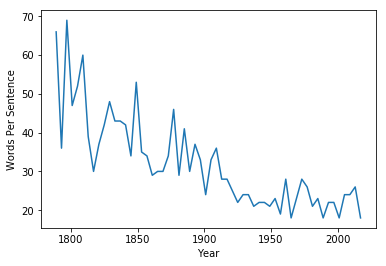

In [38]:
from nltk.corpus import inaugural
import matplotlib.pyplot as plt
%matplotlib inline
sentence_lengths = list()
x = list()
for fileid in inaugural.fileids():
    x.append(fileid[:4])
for fileid in inaugural.fileids():
    sentence_lengths.append(get_complexity(' '.join(inaugural.words(fileid)))[2])
plt.xlabel("Year")
plt.ylabel("Words Per Sentence")
plt.plot(x, sentence_lengths)

<h1>dispersion plots</h1>
<h2>Dispersion plots show the relative frequency of words over the text</h2>
<h3>Let's see how the frequency of some words has changed over the course of the republic</h3>
<h3>That should give us some idea of how the focus of the nation has changed</h3>

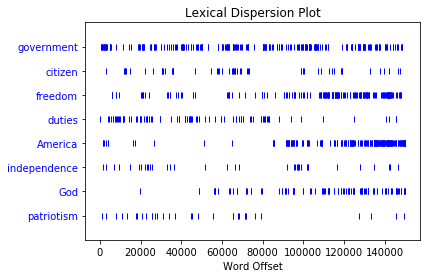

In [39]:
text4.dispersion_plot(["government", "citizen", "freedom", "duties", "America",'independence','God','patriotism'])

<h4>We may want to use word stems rather than the part of speect form</h4>
<li>For example: patriot, patriotic, patriotism all express roughly the same idea
<li>nltk has a stemmer that implements the "Porter Stemming Algorithm" (https://tartarus.org/martin/PorterStemmer/)
<li>We'll push everything to lowercase as well

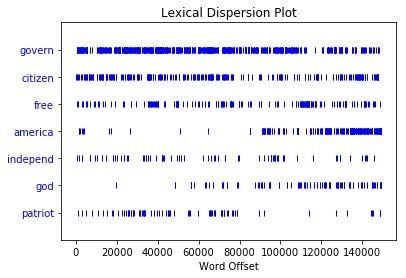

In [40]:
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
text = inaugural.raw()
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
sentences = sent_tokenize(striptext)
words = word_tokenize(striptext)
text = nltk.Text([p_stemmer.stem(i).lower() for i in words])
text.dispersion_plot(["govern", "citizen", "free", "america",'independ','god','patriot'])

<h2>Weighted word analysis using Vader</h2>
<h4>Vader contains a list of 7500 features weighted by how positive or negative they are</h4>
<h4>It uses these features to calculate stats on how positive, negative and neutral a passage is</h4>
<h4>And combines these results to give a compound sentiment (higher = more positive) for the passage</h4>
<h4>Human trained on twitter data and generally considered good for informal communication</h4>
<h4>10 humans rated each feature in each tweet in context from -4 to +4</h4>
<h4>Calculates the sentiment in a sentence using word order analysis</h4>
<li>"marginally good" will get a lower positive score than "extremely good"
<h4>Computes a "compound" score based on heuristics (between -1 and +1)</h4>
<h4>Includes sentiment of emoticons, punctuation, and other 'social media' lexicon elements</h4>


In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [42]:
headers = ['pos','neg','neu','compound']
analyzer = SentimentIntensityAnalyzer()
for i in range(len(texts)):
    name = texts[i][0]
    sentences = sent_tokenize(texts[i][1])
    pos=compound=neu=neg=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos+=vs['pos']/(len(sentences))
        compound+=vs['compound']/(len(sentences))
        neu+=vs['neu']/(len(sentences))
        neg+=vs['neg']/(len(sentences))
    print(name,pos,neg,neu,compound)

trump 0.20126086956521738 0.05552173913043478 0.7432173913043473 0.2252847826086956
obama 0.14691370558375633 0.0701522842639594 0.7829289340101528 0.21360558375634514
jackson 0.17464814814814814 0.029833333333333333 0.7955740740740739 0.5293722222222222
washington 0.15122222222222223 0.04181481481481482 0.806925925925926 0.5050629629629629


<h4>And functionalize this as well</h4>

In [43]:
def vader_comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    headers = ['pos','neg','neu','compound']
    print("Name\t",'  pos\t','neg\t','neu\t','compound')
    analyzer = SentimentIntensityAnalyzer()
    for i in range(len(texts)):
        name = texts[i][0]
        sentences = sent_tokenize(texts[i][1])
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        print('%-10s'%name,'%1.2f\t'%pos,'%1.2f\t'%neg,'%1.2f\t'%neu,'%1.2f\t'%compound)

In [44]:
vader_comparison(texts)

Name	   pos	 neg	 neu	 compound
trump      0.20	 0.06	 0.74	 0.23	
obama      0.15	 0.07	 0.78	 0.21	
jackson    0.17	 0.03	 0.80	 0.53	
washington 0.15	 0.04	 0.81	 0.51	


<h2>Named Entities</h2>
<h4>People, places, organizations</h4>
Named entities are often the subject of sentiments so identifying them can be very useful

<h4>Named entity detection is based on Part-of-speech tagging of words and chunks (groups of words)</h4>
<li>Start with sentences (using a sentence tokenizer)
<li>tokenize words in each sentence
<li>chunk them. ne_chunk identifies likely chunked candidates (ne = named entity)
<li>Finally build chunks using nltk's guess on what members of chunk represent (people, place, organization)


In [45]:
en={}
try:
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(community_data.raw().strip())
    for sentence in sentences:
            tokenized = nltk.word_tokenize(sentence)
            tagged = nltk.pos_tag(tokenized)
            chunked = nltk.ne_chunk(tagged)
            for tree in chunked:
                if hasattr(tree, 'label'):
                    ne = ' '.join(c[0] for c in tree.leaves())
                    en[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())]
except Exception as e:
    print(str(e))
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(en)

{   'America': ['GPE', 'NNP'],
    'Awesome': ['GPE', 'NNP'],
    'BEST': ['ORGANIZATION', 'NNP'],
    'Bill': ['PERSON', 'NN'],
    'Boston': ['GPE', 'NNP'],
    'Bottomless': ['GPE', 'NNP'],
    'Broadway': ['GPE', 'NNP'],
    'Brooklyn': ['GPE', 'NNP'],
    'Brunch': ['PERSON', 'NNP'],
    'CU': ['ORGANIZATION', 'NNP'],
    'Came': ['GPE', 'NN'],
    'Cana': ['PERSON', 'NNP'],
    'Cheaper': ['GPE', 'NNP'],
    'Colombia': ['GPE', 'NNP'],
    'Columbia': ['GPE', 'NNP'],
    'Columbia University': ['ORGANIZATION', 'NNP NNP'],
    'Columbian': ['GPE', 'JJ'],
    'Community': ['ORGANIZATION', 'NNP'],
    'Community Food': ['ORGANIZATION', 'NNP NNP'],
    'Company': ['ORGANIZATION', 'NNP'],
    'Country Breakfast': ['ORGANIZATION', 'NNP NNP'],
    'Delish': ['GPE', 'NNP'],
    'Dinner': ['GPE', 'NN'],
    'Disclaimer': ['GPE', 'NN'],
    'Everyone': ['GPE', 'NN'],
    'FRESH': ['ORGANIZATION', 'NNP'],
    'Fire Island Beer': ['ORGANIZATION', 'NNP NNP NNP'],
    'Flor': ['GPE', 'NNP'],
 

<h4>Assuming we've done a good job of identifying named entities, we can get an affect score on entities</h4>

In [46]:
meaningful_sents = list()
i=0
for sentence in sentences:
    if 'service' in sentence:
        i+=1
        meaningful_sents.append((i,sentence))

vader_comparison(meaningful_sents)       

Name	   pos	 neg	 neu	 compound
1          0.00	 0.00	 1.00	 0.00	
2          0.11	 0.15	 0.73	 -0.17	
3          0.53	 0.00	 0.47	 0.84	
4          0.28	 0.00	 0.71	 0.49	
5          0.23	 0.00	 0.78	 0.49	
6          0.36	 0.00	 0.64	 0.74	


<h4>We could also develop a affect calculator for common terms in our domain (e.g., food items)</h4>

In [47]:
def get_affect(text,word,lower=False):
    import nltk
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(text.strip())
    sentence_count = 0
    running_total = 0
    for sentence in sentences:
        if lower: sentence = sentence.lower()
        if word in sentence:
            vs = analyzer.polarity_scores(sentence) 
            running_total += vs['compound']
            sentence_count += 1
    if sentence_count == 0: return 0
    return running_total/sentence_count

In [48]:
get_affect(community_data.raw(),'service',True)

0.4321428571428571

<h4>The nltk function concordance returns text fragments around a word</h4>

In [49]:
nltk.Text(community_data.words()).concordance('service',100)

Displaying 7 of 7 matches:
 This is such a good brunch spot ! The food , service & ambiance was exactly what we were looking f
 I dug right in due to brunch hunger and slow service . I ' d come back again , but be sure to have
 . Will be exploring more items on the menu . Service is great - our water was also filled , our co
 All in all , a pleasant experience with nice service and nice company . It ' s not every day I get
 place was packed . Even though it was packed service was very good . The beat salad and rice bowl 
e with a friend - we were seated promptly and service was attentive . The decor was beautiful and t
h juice n on site coffee . Thanks to the kind service as well , i will remember this restaurant as 


<h2>Text summarization</h2>
<h4>Text summarization is useful because you can generate a short summary of a large piece of text automatically</h4>
<h4>Then, these summaries can serve as an input into a topic analyzer to figure out what the main topic of the text is</h4>

A naive form of summarization is to identify the most frequent words in a piece of text and use the occurrence of these words in sentences to rate the importance of a sentence. 

<h4>First the imports</h4>

In [50]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint

<h4>Then prep the text. Get did of end of line chars</h4>

In [51]:
text = community_data.raw()
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')

<h4>Construct a list of words after getting rid of unimportant ones and numbers</h4>

In [52]:
words = word_tokenize(striptext)
lowercase_words = [word.lower() for word in words
                  if word not in stopwords.words() and word.isalpha()]


<h4>Construct word frequencies and choose the most common n (20)</h4>

In [53]:
word_frequencies = FreqDist(lowercase_words)
most_frequent_words = FreqDist(lowercase_words).most_common(20)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(most_frequent_words)

[   ('i', 73),
    ('the', 46),
    ('food', 20),
    ('brunch', 20),
    ('good', 19),
    ('place', 15),
    ('nice', 13),
    ('ordered', 13),
    ('pancakes', 13),
    ('fresh', 13),
    ('came', 13),
    ('my', 12),
    ('coffee', 12),
    ('delicious', 12),
    ('we', 10),
    ('community', 10),
    ('eggs', 10),
    ('friend', 10),
    ('one', 10),
    ('get', 9)]


<h4>lowercase the sentences</h4>
candidate_sentences is a dictionary with the original sentence as the key, and its lowercase version as the value

In [54]:
sentences = sent_tokenize(striptext)
for sentence in sentences:
    candidate_sentences[sentence] = sentence.lower()
candidate_sentences

{'"I have a degree from Columbia, and now I have to get one from America."': '"i have a degree from columbia, and now i have to get one from america."',
 '- Jeff Winger, Community.': '- jeff winger, community.',
 '- The truffle egg dish: had sausage, potatoes, some leafy greens, sautéed mushrooms, and poached egg on top.': '- the truffle egg dish: had sausage, potatoes, some leafy greens, sautéed mushrooms, and poached egg on top.',
 '- Troy Barnes Man I love that show.': '- troy barnes man i love that show.',
 '-7 grains waffle: had vanilla cream, raspberry, cherry, and toasted nuts.': '-7 grains waffle: had vanilla cream, raspberry, cherry, and toasted nuts.',
 '15 minuets wait for the wait staff, 45 minuets before we got the wrong dish!': '15 minuets wait for the wait staff, 45 minuets before we got the wrong dish!',
 '2 HOURS AND NO FOOD!': '2 hours and no food!',
 "A man came over to the table and filled our waters but didn't introduce himself as our waiter so I wasn't sure if he 

In [55]:
for long, short in candidate_sentences.items():
    count = 0
    for freq_word, frequency_score in most_frequent_words:
        if freq_word in short:
            count += frequency_score
            candidate_sentence_counts[long] = count

In [56]:
sorted_sentences = OrderedDict(sorted(
                    candidate_sentence_counts.items(),
                    key = lambda x: x[0],
                    reverse = True)[:4])
pp.pprint(sorted_sentences)

OrderedDict([   ('with FRESH whipped cream was THE BEST dish there.', 132),
                (   'was kind of overkill because the pancakes and chocolate '
                    'were far sweet enough.',
                    142),
                ('another 30 minuets still no food we left.', 149),
                ('Your whole party has to be there to be sat!', 46)])


<h4>Packaging all this into a function</h4>


In [57]:
def build_naive_summary(text):
    from nltk.tokenize import word_tokenize
    from nltk.tokenize import sent_tokenize
    from nltk.probability import FreqDist
    from nltk.corpus import stopwords
    from collections import OrderedDict
    summary_sentences = []
    candidate_sentences = {}
    candidate_sentence_counts = {}
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    words = word_tokenize(striptext)
    lowercase_words = [word.lower() for word in words
                      if word not in stopwords.words() and word.isalpha()]
    word_frequencies = FreqDist(lowercase_words)
    most_frequent_words = FreqDist(lowercase_words).most_common(20)
    sentences = sent_tokenize(striptext)
    for sentence in sentences:
        candidate_sentences[sentence] = sentence.lower()
    for long, short in candidate_sentences.items():
        count = 0
        for freq_word, frequency_score in most_frequent_words:
            if freq_word in short:
                count += frequency_score
                candidate_sentence_counts[long] = count   
    sorted_sentences = OrderedDict(sorted(
                        candidate_sentence_counts.items(),
                        key = lambda x: x[1],
                        reverse = True)[:4])
    return sorted_sentences   

In [58]:
summary = '\n'.join(build_naive_summary(community_data.raw()))
print(summary)

I've come here several times with a friend for brunch and once for dinner -- we've both really enjoyed a lot of the breakfast foods available; my favorite is the brioche French toast with blackberry and lemon curd & she loves heir waffles.
There are a lot of nice places in the city where you can get a very good breakfast for 1/3rd to 1/2 less than Community.
Came here for brunch with my wife after she found the good review, and it did not disappoint!
The beans were seasoned perfectly, as was the rest of the tomato sauce, The tortilla was fresh and soft, and it came with delicious guacamole and sour cream.


In [59]:
summary = '\n'.join(build_naive_summary(le_monde_data.raw()))
print(summary)

i would recommend going for brunch over any other meal, as everything i've ordered for brunch has been quite good the shakshuka is great, and you can't anything else like it in the area.
I would love to try them out for dinner, as I said, the service was great and we were checked on regularly.
I would give them a better review because the food was good but the waiting really was long.
The food was really good and they are known for their brunch menu.


<h4>We can summarize George Washington's first inaugural speech<h4>

In [60]:
build_naive_summary(inaugural.raw('1789-Washington.txt'))

OrderedDict([('I dwell on this prospect with every satisfaction which an ardent love for my country can inspire, since there is no truth more thoroughly established than that there exists in the economy and course of nature an indissoluble union between virtue and happiness; between duty and advantage; between the genuine maxims of an honest and magnanimous policy and the solid rewards of public prosperity and felicity; since we ought to be no less persuaded that the propitious smiles of Heaven can never be expected on a nation that disregards the eternal rules of order and right which Heaven itself has ordained; and since the preservation of the sacred fire of liberty and the destiny of the republican model of government are justly considered, perhaps, as deeply, as finally, staked on the experiment entrusted to the hands of the American people.',
              83),
             ('Such being the impressions under which I have, in obedience to the public summons, repaired to the presen

<h3>gensim: another text summarizer</h3>
Gensim uses a network with sentences as nodes and 'lexical similarity' as weights on the arcs between nodes<p>


In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 
from nltk.book import *

In [62]:
import nltk
from nltk.corpus import PlaintextCorpusReader
community_root = "data/community"
le_monde_root = "data/le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
heights_root = "data/heights"
heights_files = "heights.*"
amigos_root = "data/amigos"
amigos_files = "amigos.*"
community_data = PlaintextCorpusReader(community_root,community_files)
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
heights_data = PlaintextCorpusReader(heights_root,heights_files)
amigos_data = PlaintextCorpusReader(amigos_root,amigos_files)

In [63]:
type(community_data)

nltk.corpus.reader.plaintext.PlaintextCorpusReader

In [64]:
text = community_data.raw()
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')

In [65]:
import gensim.summarization

In [66]:
#!pip install gensim

In [67]:
import gensim.summarization

In [68]:
summary = gensim.summarization.summarize(striptext, word_count=100) 
print(summary)

I've come here several times with a friend for brunch and once for dinner -- we've both really enjoyed a lot of the breakfast foods available; my favorite is the brioche French toast with blackberry and lemon curd & she loves heir waffles.
I ordered the Country Breakfast and the eggs were delicious and fluffy, the biscuit was moist and flavorful, the carrot hash browns were warm and comforting, and the ham was sweet and juicy.
This place is really good for breakfast and has great pancakes, sausages, eggs.


In [69]:
print(gensim.summarization.keywords(striptext,words=10))

brunch
nice
food
foods
egg
eggs
good
sauced
sauce
sauces
fresh
communal
community
pancakes
pancake
little


In [70]:
summary = '\n'.join(build_naive_summary(community_data.raw()))
print(summary)

I've come here several times with a friend for brunch and once for dinner -- we've both really enjoyed a lot of the breakfast foods available; my favorite is the brioche French toast with blackberry and lemon curd & she loves heir waffles.
There are a lot of nice places in the city where you can get a very good breakfast for 1/3rd to 1/2 less than Community.
Came here for brunch with my wife after she found the good review, and it did not disappoint!
The beans were seasoned perfectly, as was the rest of the tomato sauce, The tortilla was fresh and soft, and it came with delicious guacamole and sour cream.


In [71]:
text = le_monde_data.raw()
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
summary = gensim.summarization.summarize(striptext, word_count=100) 
print(summary)
#print(gensim.summarization.keywords(striptext,words=10))

I think they take forever to take your order, and deliver the food because they want you to sit in here as long as possible to make their business look busy.
i would recommend going for brunch over any other meal, as everything i've ordered for brunch has been quite good the shakshuka is great, and you can't anything else like it in the area.
i would recommend this dish if you're looking for something unique to get at this restaurant ambience is great, and service is quick and attentive (without being annoying).
I would love to try them out for dinner, as I said, the service was great and we were checked on regularly.


<h1>Topic modeling</h1>
<h4>The goal of topic modeling is to identify the major concepts underlying a piece of text</h4>
<h4>Topic modeling uses "Unsupervised Learning". No apriori knowledge is necessary
<li>Though it is helpful in cleaning up results!

<h3>LDA: Latent Dirichlet Allocation Model</h3>
<li>Identifies potential topics using pruning techniques like 'upward closure'
<li>Computes conditional probabilities for topic word sets
<li>Identifies the most likely topics
<li>Does this over multiple passes probabilistically picking topics in each pass
<li>Good intuitive explanation: http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/

In [72]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

<h4>Prepare the text</h4>

In [73]:
text = PlaintextCorpusReader("data/","Nikon_coolpix_4300.txt").raw()
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
sentences = sent_tokenize(striptext)
#words = word_tokenize(striptext)
#tokenize each sentence into word tokens
texts = [[word for word in sentence.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for sentence in sentences]
len(texts)

360

<h4>Create a (word,frequency) dictionary for each word in the text</h4>

In [74]:
print(text)

*****************************************************************************
* Annotated by: Minqing Hu and Bing Liu, 2004.              
*		Department of Computer Sicence
*               University of Illinois at Chicago              
*
* Product name: Nikon coolpix 4300
* Review Source: amazon.com
*
* See Readme.txt to find the meaning of each symbol. 
*****************************************************************************

[t]the best 4mp compact digital available  
camera[+2]##this camera is perfect for an enthusiastic amateur photographer . 
picture[+3], macro[+3]##the pictures are razor-sharp , even in macro . 
size[+2][u]##it is small enough to fit easily in a coat pocket or purse . 
weight[+1][u]##it is light enough to carry around all day without bother . 
feature[+2][u]##operating its many features is easy and often obvious - i 'm no annie lebovitz , but i was able to figure out most of its abilities just messing around with it at a camera store . 
manual[+2]##the manu

In [75]:
text

'*****************************************************************************\n* Annotated by: Minqing Hu and Bing Liu, 2004.              \n*\t\tDepartment of Computer Sicence\n*               University of Illinois at Chicago              \n*\n* Product name: Nikon coolpix 4300\n* Review Source: amazon.com\n*\n* See Readme.txt to find the meaning of each symbol. \n*****************************************************************************\n\n[t]the best 4mp compact digital available  \ncamera[+2]##this camera is perfect for an enthusiastic amateur photographer . \npicture[+3], macro[+3]##the pictures are razor-sharp , even in macro . \nsize[+2][u]##it is small enough to fit easily in a coat pocket or purse . \nweight[+1][u]##it is light enough to carry around all day without bother . \nfeature[+2][u]##operating its many features is easy and often obvious - i \'m no annie lebovitz , but i was able to figure out most of its abilities just messing around with it at a camera store . \

In [76]:
dictionary = corpora.Dictionary(texts) #(word_id,frequency) pairs
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence
print(dictionary.token2id)
#print(dictionary.keys())
#print(corpus[9])
#print(texts[9])
#print(dictionary[73])
#dictionary[4]

{'annotated': 0, 'minqing': 1, 'hu': 2, 'bing': 3, 'department': 4, 'sicence': 5, 'university': 6, 'illinois': 7, 'chicago': 8, 'product': 9, 'nikon': 10, 'coolpix': 11, '4300': 12, 'review': 13, 'meaning': 14, 'best': 15, '4mp': 16, 'compact': 17, 'digital': 18, 'available': 19, 'camera': 20, 'perfect': 21, 'enthusiastic': 22, 'amateur': 23, 'photographer': 24, 'pictures': 25, 'macro': 26, 'small': 27, 'fit': 28, 'easily': 29, 'coat': 30, 'pocket': 31, 'purse': 32, 'light': 33, 'carry': 34, 'day': 35, 'bother': 36, 'features': 37, 'easy': 38, 'obvious': 39, 'annie': 40, 'lebovitz': 41, 'able': 42, 'figure': 43, 'abilities': 44, 'messing': 45, 'store': 46, 'manual': 47, 'fine': 48, 'job': 49, 'filling': 50, 'blanks': 51, 'remain': 52, 'auto': 53, 'performs': 54, 'love': 55, 'having': 56, '12': 57, 'optional': 58, 'scene': 59, 'modes': 60, 'correspond': 61, 'situations': 62, 'actually': 63, 'seek': 64, 'use': 65, 'rechargable': 66, '16': 67, 'mb': 68, 'flash': 69, 'battery': 70, 'chargi

<h4>Do the LDA</h4>

<h4>Parameters:</h4>
<li>Number of topics: The number of topics you want generated. The larger the document, the more the desirable topics
<li>Passes: The LDA model makes through the document. More passes, slower analysis

In [77]:
#Set parameters
num_topics = 5 #The number of topics that should be generated
passes = 10 

In [78]:
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=10)

<h4>See results</h4>

In [79]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=3))

[   (0, '0.031*"camera" + 0.026*"nikon" + 0.021*"coolpix"'),
    (1, '0.025*"camera" + 0.012*"easy" + 0.011*"use"'),
    (2, '0.022*"camera" + 0.013*"optical" + 0.011*"manual"'),
    (3, '0.066*"camera" + 0.024*"picture" + 0.019*"quality"'),
    (4, '0.032*"camera" + 0.026*"digital" + 0.025*"battery"')]


<h2>Matching topics to documents</h2>
<h3>Sort topics by probability</h3>

<h4>We're using sentences as documents here, so this is less than ideal</h4>

In [80]:
from operator import itemgetter
lda.get_document_topics(corpus[0],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(corpus[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

[(2, 0.83997033658790843),
 (1, 0.040009104589197431),
 (0, 0.040008109232958625),
 (4, 0.040006365834442684),
 (3, 0.040006083755492854)]

<h3>Making sense of the topics</h3>


<h4>Draw wordclouds</h4>

In [81]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(' '.join(word_list))


    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

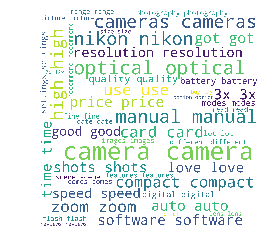

In [82]:
draw_wordcloud(lda,2)

<h4>Roughly,</h4>
<li>lda looks for candidate topics assuming that there are many such candidates
<li>looks for words related to the candidate topics
<li>assign probablilites to those words

<h3>Let's look at Presidential addresses to see what sorts of topics emerge from there</h3>
<li>Each document will be analyzed for topic</li>
<li>The corpus will consist of 58 documents, one per presidential address

In [83]:
REMOVE_WORDS = {'shall','generally','spirit','country','people','nation','nations','great','better'}
#Create a word dictionary (id, word)
texts = [[word for word in sentence.lower().split()
        if word not in STOPWORDS and word not in REMOVE_WORDS and word.isalnum()]
        for sentence in sentences]
dictionary = corpora.Dictionary(texts)

#Create a corpus of documents
text_list = list()
for fileid in inaugural.fileids():
    text = inaugural.words(fileid)
    doc=list()
    for word in text:
        if word in STOPWORDS or word in REMOVE_WORDS or not word.isalpha() or len(word) <5:
            continue
        doc.append(word)
    text_list.append(doc)
by_address_corpus = [dictionary.doc2bow(text) for text in text_list]

<h2>Create the model</h2>

In [84]:
lda = LdaModel(by_address_corpus,
              id2word=dictionary,
              num_topics=20,
              passes=10)

In [85]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=10))

[   (   0,
        '0.041*"years" + 0.028*"course" + 0.027*"office" + 0.024*"requires" + '
        '0.020*"ability" + 0.020*"resolution" + 0.017*"knowledge" + '
        '0.015*"capacity" + 0.014*"happy" + 0.014*"taken"'),
    (   1,
        '0.001*"experience" + 0.001*"power" + 0.001*"trust" + 0.001*"action" + '
        '0.001*"cause" + 0.001*"slightest" + 0.001*"subject" + 0.001*"years" + '
        '0.001*"remain" + 0.001*"seeking"'),
    (   2,
        '0.065*"believe" + 0.050*"world" + 0.029*"children" + 0.025*"price" + '
        '0.023*"future" + 0.023*"sacrifice" + 0.023*"capacity" + 0.023*"means" '
        '+ 0.021*"years" + 0.019*"place"'),
    (   3,
        '0.001*"world" + 0.001*"forward" + 0.001*"moment" + 0.001*"simple" + '
        '0.001*"years" + 0.001*"things" + 0.001*"comes" + 0.001*"believe" + '
        '0.001*"wanting" + 0.001*"small"'),
    (   4,
        '0.167*"world" + 0.038*"order" + 0.026*"years" + 0.023*"right" + '
        '0.019*"forward" + 0.018*"making" + 0.

<h2>We can now compare presidential addresses by topic</h2>

In [86]:
len(by_address_corpus)

58

In [87]:
from operator import itemgetter
sorted(lda.get_document_topics(by_address_corpus[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

[(7, 0.98272727235615753),
 (18, 0.00090909116735093758),
 (11, 0.00090909093920325498),
 (10, 0.00090909093006497619),
 (0, 0.00090909092742550021),
 (8, 0.00090909092406514297),
 (14, 0.00090909092307025075),
 (4, 0.00090909092020076269),
 (2, 0.00090909091242438061),
 (16, 0.00090909090912802914),
 (5, 0.00090909090909137248),
 (15, 0.00090909090909092286),
 (19, 0.00090909090909091115),
 (13, 0.00090909090909091039),
 (6, 0.00090909090909090985),
 (9, 0.00090909090909090985),
 (12, 0.00090909090909090985),
 (1, 0.00090909090909090974),
 (3, 0.00090909090909090974),
 (17, 0.00090909090909090974)]

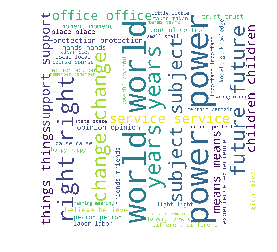

In [88]:
draw_wordcloud(lda,18)

In [89]:
print(lda.show_topic(12,topn=5))
print(lda.show_topic(18,topn=5))

[('years', 0.0010440785075603739), ('forward', 0.00099748238951095696), ('future', 0.00099509676108389664), ('things', 0.00099408393578207009), ('person', 0.00099093706347826204)]
[('power', 0.048953882436347559), ('world', 0.044468740695486085), ('right', 0.020707876793951023), ('years', 0.019387487154136848), ('change', 0.015480445576095549)]


<h1>Similarity</h1>
<h2>Given a corpus of documents, when a new document arrives, find the document that is the most similar</h2>

In [90]:
doc_list = [community_data,le_monde_data,amigos_data,heights_data]
all_text = community_data.raw() + le_monde_data.raw() + amigos_data.raw() + heights_data.raw()
#print(all_text)
#print(doc_list)

documents = [doc.raw() for doc in doc_list]
print(len(documents))
texts = [[word for word in document.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for document in documents]
dictionary = corpora.Dictionary(texts)
print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]

#print(corpus)


4
Dictionary(1368 unique tokens: ['ate', 'monday', 'night', 'working', 'dinner']...)


In [91]:
from gensim.similarities.docsim import Similarity
from gensim import corpora, models, similarities
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
doc = """
Many, many years ago, I used to frequent this place for their amazing french toast. 
It's been a while since then and I've been hesitant to review a place I haven't been to in 7-8 years... 
but I passed by French Roast and, feeling nostalgic, decided to go back.

It was a great decision.

Their Bloody Mary is fantastic and includes bacon (which was perfectly cooked!!), olives, 
cucumber, and celery. The Irish coffee is also excellent, even without the cream which is what I ordered.

Great food, great drinks, a great ambiance that is casual yet familiar like a tiny little French cafe. 
I highly recommend coming here, and will be back whenever I'm in the area next.

Juan, the bartender, is great!! One of the best in any brunch spot in the city, by far.
"""
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])


In [92]:
sims

[(1, 0.98765731), (0, 0.95548683), (3, 0.79290682), (2, 0.7698077)]

In [93]:
doc="""
I went to Mexican Festival Restaurant for Cinco De Mayo because I had been there years 
prior and had such a good experience. This time wasn't so good. The food was just 
mediocre and it wasn't hot when it was brought to our table. They brought my friends food out 
10 minutes before everyone else and it took forever to get drinks. We let it slide because the place was 
packed with people and it was Cinco De Mayo. Also, the margaritas we had were slamming! Pure tequila. 

But then things took a turn for the worst. As I went to get something out of my purse which was on 
the back of my chair, I looked down and saw a huge water bug. I had to warn the lady next to me because 
it was so close to her chair. We called the waitress over and someone came with a broom and a dustpan and 
swept it away like it was an everyday experience. No one seemed phased.

Even though our waitress was very nice, I do not think we will be returning to Mexican Festival again. 
It seems the restaurant is a shadow of its former self.
"""
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
sims

[(3, 0.99212909), (2, 0.9868139), (1, 0.93145514), (0, 0.67548543)]